# Ejercicio 3

Tal y como se determinó en el enunciado, la cantidad máxima de clientes en simultáneo es de 50. Por lo tanto, tenemos un total de 51 estados: del 1 al 51. En el instante t, la cantidad de gente conectada más uno será nuestro estado iésimo.

De ésta forma, armar la matriz de transición es algo trivial ya que la P de que el home banking pase del estado i al j está dada por la fórmula P(i->j)

    M = | P(1->1)  P(1->2)   P(1->3)   P(1->4)   ...   P(1->51)      |
        | P(2->1)  P(2->2)   P(2->3)   P(2->4)   ...   P(2->51)      |
        | P(3->1)  P(3->2)   P(3->3)   P(3->4)   ...   P(3->51)      |
        |  ....     ....      ....      ....     ...    ....         |
        | P(51->1)  P(51->2)   P(51->3)   P(51->4)   ...   P(51->51) |
        
Adonde P(i->j) es

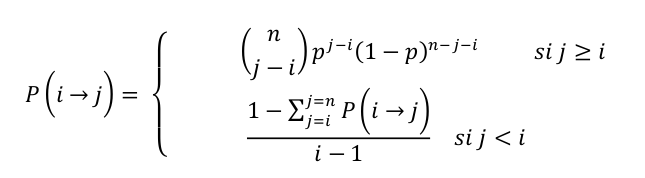

In [16]:
from math import factorial

class HomeBanking():
    
    def __init__(self):
        self.estado_actual = 1
        self.estados = []
        
    def calcular_matriz(self):
        def P(i, j):
            p = 0.7
            n = 51
            if j >= i:
                comb = ( factorial(n) / factorial(n-(j-i)) ) / (factorial(j-i))
                res1 = comb * p**(j-i) * (1-p)**(n-(j-i))
                return res1

            # j < i
            suma = 0
            for x in range(i, n):
                suma += P(i, x)

            res2 = (1 - suma) / (i-1)
            return res2

        M = [[P(i, j) for j in range(1, 52)] for i in range(1, 52)]
        self.matriz = M
        return self.matriz
    
    def simular_n_observaciones(self, n):
        self.estados = []
        for i in range(0, n):
            pass
        
hb = HomeBanking()
M = hb.calcular_matriz()

Como primera medida, trataremos de determinar la matriz de transición, para lo que necesitaremos evaluar los autovalores de M. Según su valor vamos a poder ver si M^(n) converge

In [19]:
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(M)
for e in eigenvalues:
    if abs(e) > 1:
        print('Este falla {0}'.format(e))

Este falla (1.0197614687852017+0j)


Ahora lo que sucede es que como hay uno cuyo modulo es mayor que 1 deberíamos decir que no converge con N-> inf...

Obviamente no es lo que vamos a decir, de hecho podemos probarlo y después vemos qué pasa

In [22]:
M_n = np.linalg.matrix_power(M, 100)
M_n

array([[0.15933146, 0.15933096, 0.15932909, ..., 0.14675865, 0.1399951 ,
        0.13299797],
       [0.1592467 , 0.1592462 , 0.15924433, ..., 0.14668058, 0.13992063,
        0.13292722],
       [0.15916679, 0.15916629, 0.15916442, ..., 0.14660698, 0.13985041,
        0.13286052],
       ...,
       [0.16154757, 0.16154705, 0.16154516, ..., 0.14879989, 0.14194226,
        0.13484781],
       [0.16148368, 0.16148317, 0.16148127, ..., 0.14874104, 0.14188613,
        0.13479448],
       [0.16142109, 0.16142058, 0.16141869, ..., 0.14868339, 0.14183113,
        0.13474224]])

## b) SIimulación de 100 observaciones. Cómo se modifica la cantidad de clientes conectados